# Week 2: The Logistic Map and Root Finders

## Place All Library Imports in This Section

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import math

# The Logistic Map

## The Basic Map

### The Function Itself

<font color = blue>
    
Start by creating a function of two variables `a` and `x`, which outputs the function $F_a(x) = ax(1-x)$.

In [8]:
# define the function Fa(x)
# x is in [0, 1]
# a is in [0, 4]
def F(a, x):
    """
    The function itself which models our function F_a(x)
    a : number between 0 and 4
    x : number between 0 and 1
    returns: F_a(x)
    """
    return a*x*(1-x)

F(1, .5)

0.25

### The Map Function: Version 1

<font color = blue>
    
Now create a function that takes three inputs: an intial value `x_0`, a parameter `a`, and an integer `map_count` = m, and outputs an array of `map_count` + 1 values $\{x_0, x_1, x_2, \dots, x_m\}$, where

$$
x_{k+1} = F_a(x_k)
$$

Do this starting with a list of just one element, for example `mapping_array = np.array([x0])`.  Then use a `for` loop to sequentially create the later values of $x_k$, and append each to the array `mapping_array`.

To do this, you may want to look up the `numpy` function `append`.

Confirm that your code is working by generating an array of 5 elements using the initial value `x_0` = 0.5, with `a` = 0.5, and `map_count` = 5.  Your output should be

$$
\{0.5, 0.125, 0.0546875, 0.0258484, 0.0125901, 0.0062158\}
$$

In [11]:
# takes in x0 value a value and map_count (number of values m) which we take to output a list of
# of values after x0 is inputted and the result is outputted m times 
def map(x_0, a, map_count):
    """
    computes the mapping from x_o all the way to the nth item by repeatedly putting
    the new x's into the function F_a(x)
    x_o : The initial x value we are feeding into to function b/w (0, 1)
    a : number between 0 and 4
    map_count : the number of times we are feeding something into the function
    returns an array of each of the outputted values from the function
    """
    mapping_array = np.array(x_0)
    for i in range(map_count):
        mapping_array = np.append(mapping_array, F(a, x_0))
        x_0 = F(a, x_0)
    return mapping_array

map(.5, .5, 5)

array([0.5       , 0.125     , 0.0546875 , 0.02584839, 0.01259012,
       0.00621581])

### The Map Function: Version 2

<font color = blue>
    
Now create a second version of the same function.  This time, instead of starting with a list that has a single element, start by creating a list with `map_count` + 1 elements, each of which is equal to `x_0`.  Then, inside your `for` loop, sequentially replace the elements of this list with the values $x_k$ which are computed.  Again confirm that your code works as desired.

In [14]:
# more efficient version of function above that uses replacement
# rather than append
def mapV2(x_0, a, map_count):
    """
    Improved version of map that uses replacement in order to maximize efficiency
    x_o : The initial x value we are feeding into to function b/w (0, 1)
    a : number between 0 and 4
    map_count : the number of times we are feeding something into the function
    returns an array of each of the outputted values from the function
    """
    mapping_array2 = np.full(map_count + 1, x_0)
    for i in range(map_count + 1):
        mapping_array2[i] = x_0
        x_0 = F(a, x_0)
    return mapping_array2

mapV2(.5, .5, 5)

array([0.5       , 0.125     , 0.0546875 , 0.02584839, 0.01259012,
       0.00621581])

### Efficiency and Timing

<font color = blue>
    
We want to compare the efficiency of the two functions we have just created.  In order to do this, generate lists of how long it takes to run each function (using the `time` function from the `time` module you explored last time), with `x_0` = 0.5 and `a` = 0.5, and `mapping_count` $= \{1000, 2000, 3000, \dots, 50000\}$.  

Create a single graph comparing each of these time lists, and **discuss** what you have learned.

In the rest of the assignment, use the more efficient of your two functions!

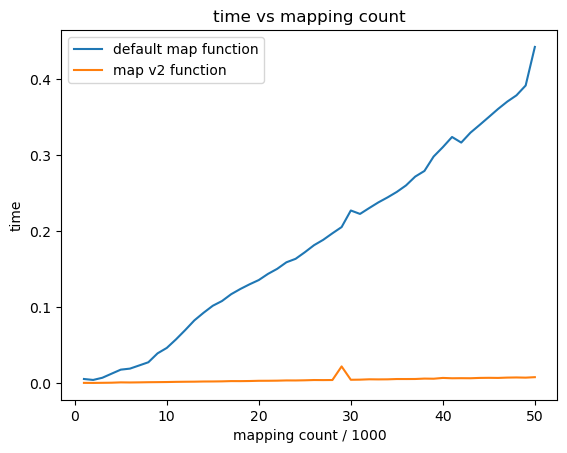

In [103]:
# tests the efficiency of the two functions above and outputs a graph that displays this
def time_test():
    """
    Tests the time efficiency of the Map functions in order to choose the most efficient of the 2.
    Plots the relationship between both of their time dependencies
    """
    times1 = np.zeros(50)
    times2 = np.zeros(50)
    for i in range(50):
        mapping_count = (i + 1) * 1000 # the current number of values we want
        start = time.time()
        value = map(.5, .5, mapping_count)
        end = time.time()
        mapping_count2 = (i + 1) * 1000 # the current number of values we want
        start2 = time.time()
        value2 = mapV2(.5, .5, mapping_count)
        end2 = time.time()
        times1[i] = end - start
        times2[i] = end2 - start2
        xvals = np.arange(1, 51)
    plt.xlabel('mapping count / 1000')
    plt.ylabel('time')
    plt.title('time vs mapping count')
    plt.plot(xvals, times1, label='default map function')
    plt.plot(xvals, times2, label='map v2 function')
    plt.legend()
    plt.show

time_test()

As we can see in the graph, the v2 function is much more efficient, presumably I have learned that the append function is innefficient because that is the only change between the two functions. I think that it is inefficient because each time that I want to append something to the list I have to add another local variable into the namespace.

## Convergence Behaviors

### Fixed Points

<font color = blue>
    
Now you want to confirm that $x_0 = 0$ and $x_0 = \frac{a - 1}{a}$ are fixed points of the logistic map.  Do this by generating arrays with `map_count` = 10 that start at these points, and showing they stay the same.  Do this for the values of a:

$$
a = \{0.5, 1.5, 2.5, 3.5\}
$$

(For $a = 0.5$, you only need to check $x_0 = 0$, as the other is not considered a fixed point unless $a \ge 1$.)

In [22]:
f1 = mapV2(0, .5, 10)
f2 = mapV2(0, 1.5, 10)
f3 = mapV2(0, 2.5, 10)
f4 = mapV2(0, 3.5, 10)
f5 = mapV2(((1.5 - 1)/1.5), 1.5, 10)
f6 = mapV2(((2.5 - 1)/2.5), 2.5, 10)
f7 = mapV2(((3.5 - 1)/3.5), 3.5, 10)
print(f1)
print(f2)
print(f3)
print(f4)
print(f5)
print(f6)
print(f7)
# notice that the last 3 f5, 6, and 7 all converge to a-1/a whereas the first 4 all converge to zeros as we expect

[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571]


### x = 0 Fixed Point Stability

<font color = blue>
    
Confirm that when $a < 1$, an arbitrarily chosen initial point will quickly converge to zero.  The easiest way to see this is by plotting the results.  Create a graph showing two lists of points for `map_count` = 100, starting at two different initial values $x_0$, with two different values $0 < a < 1$.  **Discuss** the results.

<function matplotlib.pyplot.show(close=None, block=None)>

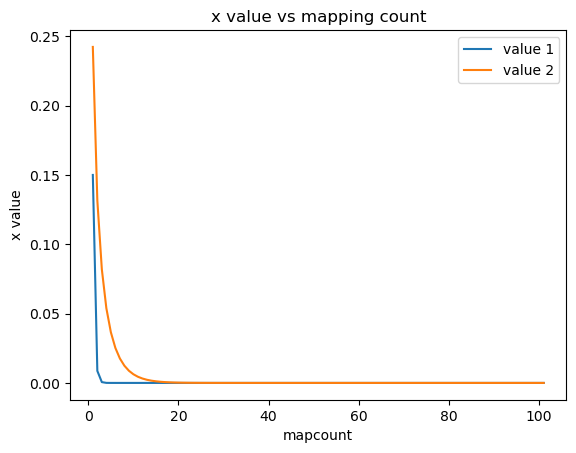

In [25]:
# create x axis (map_count 1 - n) and y axis (from map function)
mapcount = 100
# notice random.random() is a random # b/w 0, 1
x_01 = random.random() 
x_02 = random.random()
a1 = random.random()
a2 = random.random()
arr1 = mapV2(x_01, a1, mapcount)
arr2 = mapV2(x_02, a2, mapcount)
axis = np.arange(1, 102)

# create the graph showing the two situations converging to x = 0
plt.xlabel('mapcount')
plt.ylabel('x value')
plt.title('x value vs mapping count')
plt.plot(axis, arr1, label='value 1')
plt.plot(axis, arr2, label='value 2')
plt.legend()
plt.show

### ${\pmb x = \frac{a - 1}{a}}$ Fixed Point Stability

<font color = blue>
    
Now do the same for the region $1 < a < 3$, showing that arbitrarily chosen initial values converge to the second fixed point $\frac{a - 1}{a}$.  Choose two values of $a$, one of which has $1 < a < 2$ and the other of which has $2 < a < 3$, and two arbitrary values of $x_0$.  For each value of $a$, compute what the theoretical fixed point should be, and display that on your plot as a horizontal line (so you can confirm the convergence more readily.)  Again, **discuss** your results.

<function matplotlib.pyplot.show(close=None, block=None)>

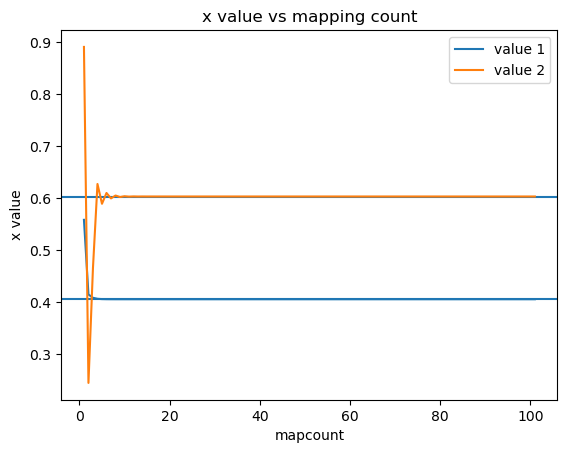

In [28]:
# same thing as cell above but with new a values and theoretical non zero fixed points
a1 = random.uniform(1, 2)
a2 = random.uniform(2, 3)
x01 = random.random()
x02 = random.random()

mapcount = 100
arr1 = mapV2(x01, a1, mapcount)
arr2 = mapV2(x02, a2, mapcount)
axis = np.arange(1, 102)

plt.xlabel('mapcount')
plt.ylabel('x value')
plt.title('x value vs mapping count')
plt.axhline((a1 - 1) / a1)
plt.axhline((a2 - 1) / a2)
plt.plot(axis, arr1, label='value 1')
plt.plot(axis, arr2, label='value 2')
plt.legend()
plt.show

As we can see in the graph, both the random x0 values converge to their theoretical fixed points. In this convergence we can see that the lines go both over and under the theoretical fixed point as we predicted. 

### Period 2 Convergence

<font color = blue>
    
Now pick a value of $a$ in the region $3 < a < 1 + \sqrt{6}$, along with an arbitrary initial value $x_0$.  For this value of $a$, determine (theoretically) what the fixed points of $F_a^{(2)}(x)$ should be.  Plot these values as horizontal lines together with the series that results from your chosen initial value.  **Discuss** the results.

3.397221832299742


<function matplotlib.pyplot.show(close=None, block=None)>

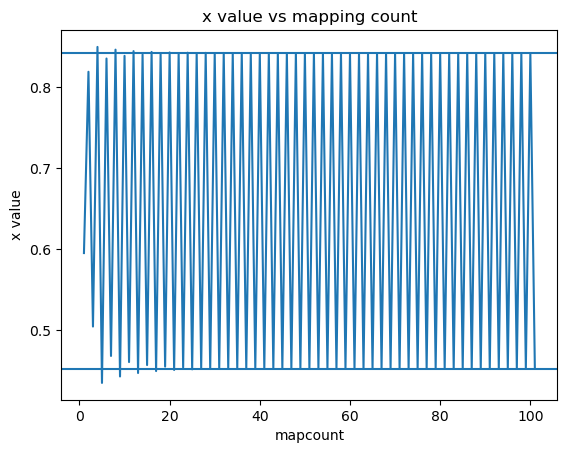

In [32]:
# initialize x and a to random values within correct bounds and use the map function to find x values for our plot
mapcount = 100
a3 = random.uniform(3, (1 + (6**(1/2))))
x03 = random.random()
arr3 = mapV2(x03, a3, mapcount)
axis = np.arange(1, 102)

# plot the data
plt.xlabel('mapcount')
plt.ylabel('x value')
plt.title('x value vs mapping count')
plt.plot(axis, arr3)

print(a3)

# finding and plotting the theoretical fixed points by substituting into the quadratic formula
p1 = (1 + a3 + (((1 + a3) * (a3 - 3))**(1/2))) / (2*a3)
p2 = (1 + a3 - (((1 + a3) * (a3 - 3))**(1/2))) / (2*a3)

plt.axhline(p2)
plt.axhline(p1)

plt.show

As we can see in the graph, there are two fixed points that we move between. As we defined them in class they are x (bar bar)- and x(bar bar)+ to find these two values I solved the quadratic 0 = a^2 x^2 - a(1 + a)x + (1 + a) to find the two theoretical fixed points for an a within 3 and 1 + sqrt(6)

### Period 4 Convergence

<font color = blue>
    
Now pick a value of $a$ in the range $1 + \sqrt{6} < a < 3.5441$, and show (by producing a graph) that after a large number of mappings we essentially cycle through four different values.  Take your list out to `map_count` = 300 (so that convergence behavior is easier to see.)  This time, for your particular value of $a$, determine what these four limiting values are "experimentally" (and include them as horizontal lines in your graph) -- and explain your process in a **discussion**.

<function matplotlib.pyplot.show(close=None, block=None)>

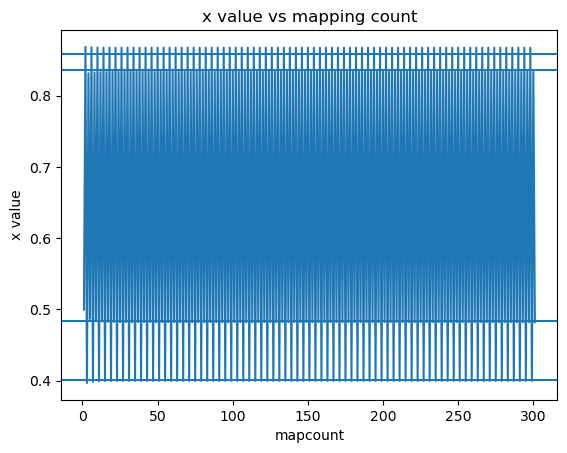

In [105]:
# initialize x and a to random values within correct bounds and use the map function to find x values for our plot
mapcount = 300
a4 = random.uniform((1 + (6**(1/2))), 3.5441)
x04 = random.random()
arr4 = mapV2(x04, a4, mapcount)
axis = np.arange(1, 302)

# plot the data
plt.xlabel('mapcount')
plt.ylabel('x value')
plt.title('x value vs mapping count')
plt.plot(axis, arr4)

# averaging the value of every fourth item in arr4 (after the 10th item in the array)
len = 0
avg1 = 0
avg2 = 0
avg3 = 0
avg4 = 0
for i in range(mapcount + 1):
    if i >= 10:
        if i % 4 == 0:
            avg1 += arr4[i]
        elif i % 4 == 1:
            avg2 += arr4[i]
        elif i % 4 == 2:
            avg3 += arr4[i]
        else:
            avg4 += arr4[i]
        len = len + 1

p1 = avg1 / (len/4)
p2 = avg2 / (len/4)
p3 = avg3 / (len/4)
p4 = avg4 / (len/4)

# plot the computed averages
plt.axhline(p4)
plt.axhline(p3)
plt.axhline(p2)
plt.axhline(p1)

plt.show

for my value of a ~ 3.47 I found the four limiting values to be ~.84, .47, .87, and .41. The way that I came up with these values was by taking the average of the first second third and fourth values in the periodic (repeating) list of values. I also made sure to ignore the first 10 values in the list as I can clearly see that in the graph it takes a few terms for the approximation to get close to the true limits

### Finding the Next Bifurcation Point

```
```

<font color = blue>
    
Come up with, and implement, a process to approximate the next "bifurcation point": the value of $a$ at which period 4 converge turns into period 8 convergence.  (Hint: to get good results you may want to increase the value of `map_count` that you use).

Then, create a graph that displays the first three bifurcation points $[a_0 = 3, a_1 = 1 + \sqrt{6}, a_2]$, along with a horizontal line at the limiting value $a_{\infty} \approx 3.5699456$.

**Discuss** both your results and the method you used to get them.

3.5454897427831673


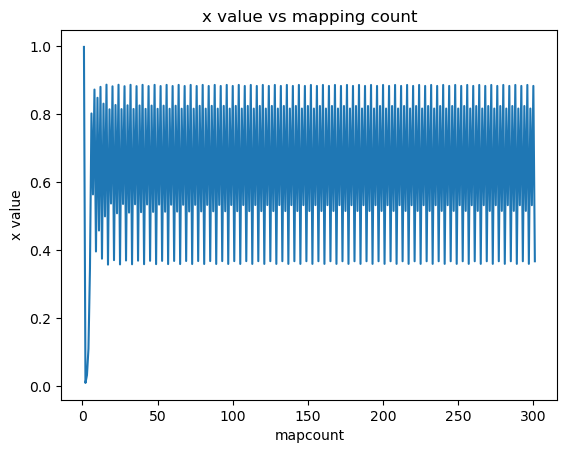

In [107]:
# initialize variables to correct values to begin testing
mapcount = 300
x05 = random.random()
axis = np.arange(1, 302)
a5_initial = 1 + np.sqrt(6)

# increases a until condition is met which says that every 8th item is the same and every 4th is not
for i in range(1200): # 1200 is the # of steps (.0001) that it takes to get from 1 + sqrt(6) to a_inf
    a5_initial += .001 
    arr5 = mapV2(x05, a5_initial, mapcount)
    j = random.randint(1, mapcount - 12) # 12 allows gives me room to check whether or not there are 8 or 4 limits
    if round(arr5[j + 8], 2) == round(arr5[j], 2) and round(arr5[j + 4], 2) != round(arr5[j], 2):
        print(a5_initial)
        break


plt.xlabel('mapcount')
plt.ylabel('x value')
plt.title('x value vs mapping count')
plt.plot(axis, arr5)


## keep increasing the a5 number until the 8 % 0 the value is very similar
# 3.450 -> 3.570

## Building a Bifurcation Diagram

### The Map Function: Version 3

<font color = blue>
We now want to actually create the bifurcation diagram.  However, to do so efficiently we need to go back to our original mapping function, and modify it.  

First, we want the output of the function to be just the final result of the mapping, $x_N$ where $N = $`map_count`.  And since we need only this last element, there's no reason to keep track of the entire array as we go (and leaving this out makes things much more efficient.)

<font color = blue>
    
Second, instead of the user specifying the initial point $x_0$, we want the function to generate a random initial point in the range $[0, 1]$, automatically.  (To do this you will need to use the `random` module, with the function `uniform`).

Create your final version of the mapping function, and test it out to be sure it's working properly.

In [44]:
# more efficient version of function above that uses replacement
# rather than append
def mapV3(a, map_count):
    """
    Version 3 of map function that finds the final mapping using our function f
    a : number b/w 0, 4
    map_count : the number of times we are feeding our resulting x value back into our function
    returns the x_n value (otherwise known as the final value in our mapping)
    """
    x_0 = random.random()
    for i in range(map_count + 1):
        x_0 = F(a, x_0)
    return x_0

mapV3(.9, 1000)

1.1222899474648315e-47

### A Data Generating Function

<font color = blue>
    
Now we want to create the function that will actually generate our data.  This function will take two inputs: the total number of data points `data_count`, and the number of mappings `map_count` we will use to generate each data point.  

Inside the function, begin by generating two arrays of `data_count` elements, each of which zero.  (One will hold your values of $a$ and the other will hold the outputs of your mapping.)

Then, inside a loop that runs `data_count` times, generate a random value for $a$ in the range $[0, 4]$, use that value of $a$ and the function from the previous section to generate a final point from the mapping.  Finally, replace the next element of each of your arrays with those values.

After the loop is complete, return both arrays.

Confirm your code works as desired.

In [47]:
def gen_data(data_count, map_count):
    """
    generates data using random a value
    data_count : # of mappings that we are doing and the length of both of the returned lists
    map_count : # of times we are repeatedly feeding x into f_a(x)
    returns : 2 arrays, 1 corresponding to a values and the other to the final output of each of the data_count mappings
    """
    a_values = np.zeros(data_count)
    mapping_output = np.zeros(data_count)
    for i in range(data_count):
        a_rand = random.uniform(0, 4)
        final_point = mapV3(a_rand, map_count)
        a_values[i] = a_rand
        mapping_output[i] = final_point
    return a_values, mapping_output

gen_data(10, 100)

(array([1.55932567, 1.77657094, 3.81948791, 1.24426423, 3.84196044,
        2.74723722, 3.38349487, 3.72911935, 2.83356777, 0.02130052]),
 array([3.58697147e-001, 4.37117889e-001, 6.62236858e-001, 1.96312187e-001,
        4.91703949e-001, 6.35997942e-001, 8.39375757e-001, 8.25782018e-001,
        6.47088024e-001, 2.29402952e-170]))

### Estimating Time

```
```

<font color = blue>
    
Before you generate the data you will use to actually create your diagram, you want to have a sense for how much computational time that data set will require.

Set a "target time" (a goal for how much computational time you are willing to devote to generating your data).

Using modest values for the parameters `data_count` and `map_count` to run trials, work out how large you can afford to make the parameters.  (If you're doing this correctly, the trials should use substantially smaller values than the ones you will eventually implement)

**Discuss** both your method and your results.

In [49]:
target_time = .5 # seconds
start = 0
end = 0

data_count = 100
map_count = 100

# testing how much data we can generate in .5 seconds
while end - start < .5:
    start = time.time()
    gen_data(data_count, map_count)
    end = time.time()
    data_count = data_count * 10
    map_count = map_count * 10

print(map_count, data_count)
print(end - start)

100000 100000
9.012579202651978


The method I used was to increase both map count and data count until my total time to run the data generation for those map count and data count numbers reached .5 seconds. I found that I could let both data count and map count get up to 100,000.

### * The Bifurcation Diagram

<font color = blue>
    
You now want to actually generate (and **discuss**) the bifurcation diagram.  Collect your data, and display it on a graph.  

**Some sections of each assignment will be marked with an asterisk (as this one is.)  These sections are considered "results" sections.  In them, make sure that all graphs are labeled carefully, and discussions are thorough and focus on interpreting the graphical results and connecting them to the physics (or in this case, math) that is being explored.**

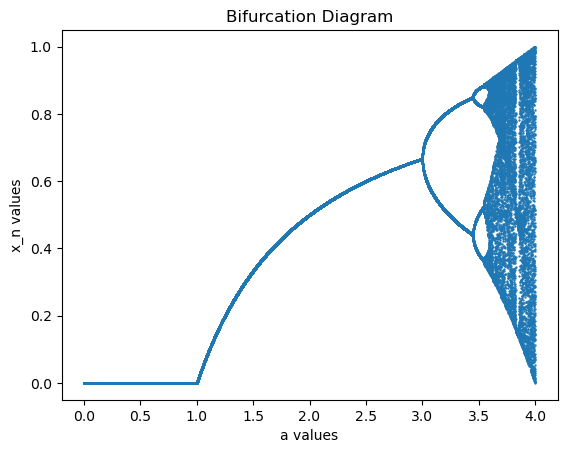

In [53]:
# generating and graphing the data from gen data and plotting it to form a bifurcation diagram
map_count = 10000
data_count = 100000
a_values, mapping_values = gen_data(data_count, map_count)
plt.xlabel('a values')
plt.ylabel('x_n values')
plt.title('Bifurcation Diagram')
plt.scatter(a_values, mapping_values, s = .5)

To create this bifurcation diagram I simply used the functions that I have made in the previous two sections. This graph is very interesting because it helps us visualize each of these limiting values for each a value. To see this we can first observe what happens when a reaches 3. We can see that between a = 3 and a = 1 + sqrt(6), there are two well defined limiting values for x_n which we found to be the solution to the quadratic in the period 2 convergence problem. Going further, we can see another similar period when a is between 1 + sqrt(6) and ~3.5441 where there are 4 values. As we get further into the a's we can see that it starts to turn in to chaos around and after the a_infinity a value.

## The Basic Bisection Routine

### Bisection Module

<font color = blue>
Write your bisection routine as a function.  It should take, as inputs, a function (the function whose roots we are interested in), an initial bracketing, (that is, a pair $x_{\ell}$ and $x_r$), and a tolerance $\epsilon$ that specifies how close to zero the function should be before the module exits. 

-1.1952072727581253

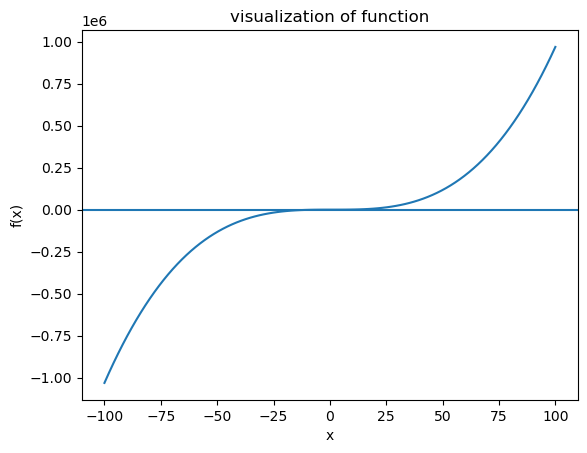

In [58]:
def f(x):
    """
    test polynomial function
    x : variable
    """
   return (x**3) - (math.pi * (x**2)) - ((2**1/2) * x) + 5


x = np.linspace(-100, 100, 100)


plt.axhline(0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('visualization of function')
plt.plot(x, f(x))

# takes in the function we are interested in,  list with two items (beginning brackets) and epsilon which is the tolerance for how close
# the function should get to zero (absolute value).
def bisection(function, bracketing, e):
    """
    takes in the function we are interested in,  list with two items (beginning brackets) and epsilon which is the tolerance for how close
    the function should get to zero (absolute value).
    function : the function whose roots we are interested in
    bracketing : initial points that our zero is between 
    e : how close we want to get to zero before we are finished
    returns : the midpoint corresponding to the root of the function
    """
    midpoint = (bracketing[1] + bracketing[0]) / 2
    if abs(function(midpoint)) <= e:
        return midpoint
    else:
        if function(bracketing[1]) * function(midpoint) < 0:
            return bisection(function, [midpoint, bracketing[1]], e)
        else: 
            return bisection(function, [bracketing[0], midpoint], e)

bisection(f, [-75, 75], 10**-8)

### Simple Test

<font color = blue>
Test your code on the simple function

$$
f(x) = x^3 - \pi x^2 - \sqrt{2} x + 5
$$

Remember to plot it first, so that you know how to start your initial bracketing.  Find all three roots, using $\epsilon = 10^{-8}$.

## The Range Finder

<font color = blue>
In class we showed that the (dimensionless) range of a projectile $r(u, \theta_0)$ would satisfy the equation

$$
0 = \frac{ur(u\sin\theta_0 + 1)}{\cos\theta_0} + \ln\left[1 - \frac{ur}{\cos\theta_0}\right]
$$

where $\theta_0$ is the initial angle and $u$ is the ratio of initial speed to terminal velocity.

### Part 1: A Specific Angle and u-value

<font color = blue>
    
Find the value of the range $r$ for the angle $\theta_0 = \frac{\pi}{6}$ and the velocity $u = 0.01$.  Remember to plot the function you are trying to root-find first, so that you know how to start your initial bracketing.  **Discuss** how your result compares with what you would get in the drag-free case for the same initial angle.  Does this make sense?

/var/folders/xj/m3v1xx6n4rl7kwn57frntw_r0000gn/T/ipykernel_67003/2139456354.py:3: RuntimeWarning: invalid value encountered in log
  return (((u * r) * ((u * np.sin(theta)) + 1)) / (np.cos(theta))) + (np.log(1 - ((u * r) / np.cos(theta))))


0.8603515625

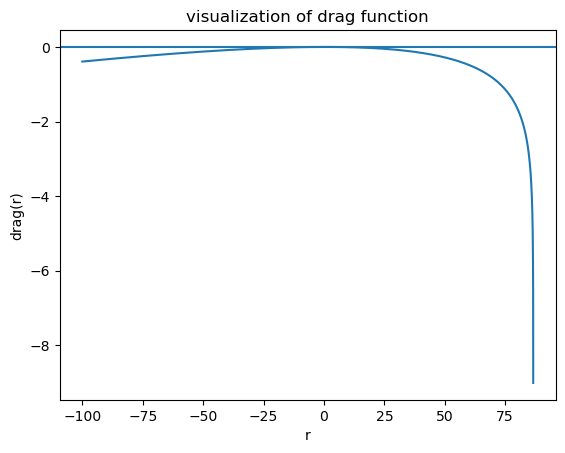

In [65]:
# drag function, theta cannot equal pi/2 or 3pi/2 and ur/cos(theta) > 1
def drag(r, u = .01, theta = math.pi / 6):
    """
    drag function modeling a ball thrown with drag
    r : dimensionless variable representing distance r travelled as a ration to maximum r
    u : dimensionless variable representing v_o/v_t
    theta: the angle that the object is thrown into the air at (in relation to the x axis)
    """
    return (((u * r) * ((u * np.sin(theta)) + 1)) / (np.cos(theta))) + (np.log(1 - ((u * r) / np.cos(theta))))

r = np.linspace(-100, 100, 10000)


plt.axhline(0)
plt.xlabel('r')
plt.ylabel('drag(r)')
plt.title('visualization of drag function')
plt.plot(r, drag(r))

bisection(drag, [0, 2], 10**-8)

### Part 2: A Function of u and initial angle

<font color = blue>
Write a function that takes as inputs $\theta_0$ and $u$, and returns the range $r$.  

The hardest part of this is working out how to find the "initial bracketing".  Especially tricky is that the function you are root finding on is not well defined for all values of $r$: first you need to establish where the function "fails" and make sure that your bracketing avoids this.  **Discuss** how you solved this problem.

In [68]:
def drag_bisection(u, theta):
    """
    Computes the bisection algorithm for our drag function with any u and theta values
    u : dimensionless variable representing v_o/v_t
     : initial points that our zero is between 
    theta: the angle that the object is thrown into the air at (in relation to the x axis)
    returns the midpoint
    """
    if theta == np.pi/2 or theta == 3*(np.pi)/2:
        return error
    bracketing = [(-np.cos(theta)/u) + .001, np.cos(theta)/u]
    midpoint = (bracketing[1] + bracketing[0]) / 2
    while abs(drag(midpoint, u = u, theta = theta)) > 10**-8: # setting 10**-8 as close enough value (epsilon)
        if drag(bracketing[1], u = u, theta = theta) * drag(midpoint, u = u, theta = theta) < 0:
            bracketing[0] = midpoint
            midpoint = (bracketing[1] + midpoint) / 2
        else: 
            bracketing[1] = midpoint
            midpoint = (bracketing[0] + midpoint) / 2
    return midpoint

drag_bisection(.01, math.pi/6)

0.8604285549357986

### * Part 3: Graphs

<font color = blue>
    
Use this function to make a single plot showing four curves: $r(\theta_0)$ vs. $\theta_0$ for $u = 0.5, 1.0, 2.0, 4.0$.  Let $\theta_0$ range from $0.01$ to $\frac{\pi}{2} - 0.01$ (as the endpoints are tricky).  Remember to label your plot thoroughly (including a legend), and **discuss** the results physically.

/var/folders/xj/m3v1xx6n4rl7kwn57frntw_r0000gn/T/ipykernel_67003/2139456354.py:3: RuntimeWarning: divide by zero encountered in log
  return (((u * r) * ((u * np.sin(theta)) + 1)) / (np.cos(theta))) + (np.log(1 - ((u * r) / np.cos(theta))))


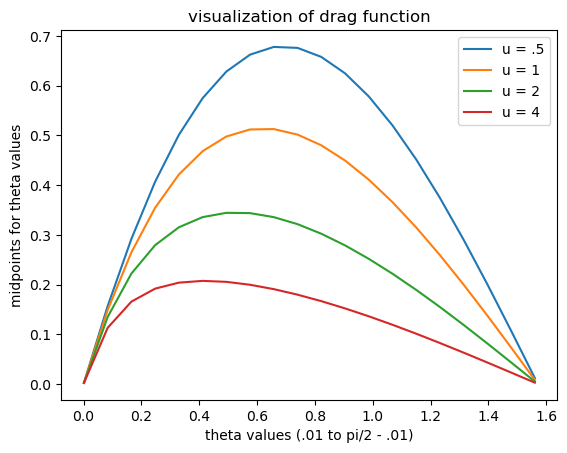

In [71]:
theta = np.linspace(.001, (np.pi/2) - .01, 20)
u1_midpoints = np.zeros(20)
u4_midpoints = np.zeros(20)
u3_midpoints = np.zeros(20)
u2_midpoints = np.zeros(20)

for i in range(20):
    u1_midpoint = drag_bisection(.5, theta[i])
    u1_midpoints[i] = u1_midpoint

for i in range(20):
    u2_midpoint = drag_bisection(1, theta[i])
    u2_midpoints[i] = u2_midpoint

for i in range(20):
    u3_midpoint = drag_bisection(2, theta[i])
    u3_midpoints[i] = u3_midpoint

for i in range(20):
    u4_midpoint = drag_bisection(4, theta[i])
    u4_midpoints[i] = u4_midpoint



plt.xlabel('theta values (.01 to pi/2 - .01)')
plt.ylabel('midpoints for theta values')
plt.title('visualization of drag function')
plt.plot(theta, u1_midpoints, label = "u = .5")
plt.plot(theta, u2_midpoints, label = "u = 1")
plt.plot(theta, u3_midpoints, label = "u = 2")
plt.plot(theta, u4_midpoints, label = "u = 4")
plt.legend()

from this graph we can see a handful of interesting things about our drag system. Firstly we can see that the graph is maximized (for all of the u values) less then halfway between .01 and pi/2 - .01, which means that distance is optimized when you throw the object just under 45 degrees. We can also see that as u gets higher the total distance the object gets becomes much smaller. This makes sense because if u is bigger that means the object must be coming down in speed to terminal velocity, whereas if it is smaller the object can still accelerate.

# Any Other Problem

<font color = blue>
    
Find a physical problem different from the ones discussed above that requires either a numerical root finder to complete.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and **discuss** their significance.

The problem I am going to do involves analyzing keplers equation for eliptical orbits. In order to analyze this function, I am going to looks at the value of E (eccentric anomaly) while changing M to see their effect on each other. To find E I am going to use my root finder.

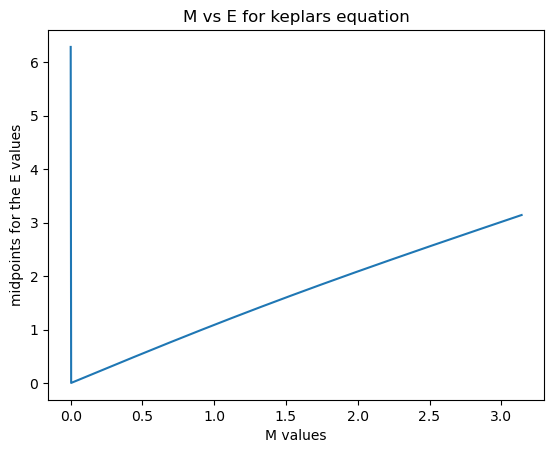

In [135]:
def keplers_equation(E, M, e):
    """
    E - eccentric anomaly
    M - mean anomaly
    e - eccentricity
    """
    return E - e * math.sin(E) - M

def bisection_method(func, M, e, low, high, tol=1e-6, max_iter=1000):
    """
    func - the function we want to find the root for, in this case keplers equation
    M - mean anomaly (input to the function)
    e - eccentricity (input to the function)
    low - lower bound for the initial guess
    high - upper bound for the initial guess
    tol - tolerance for the solution (accuracy)
    max_iter - maximum number of iterations to prevent infinite loops
    returns: The root of the equation within the specified tolerance.
    """
    for i in range(max_iter):
        mid = (low + high) / 2.0
        f_low = func(low, M, e)
        f_mid = func(mid, M, e)

        # Check if mid is the root or if the interval is smaller than the tolerance
        if abs(f_mid) < tol or (high - low) < tol:
            return mid
        
        # Decide whether to go left or right in the bisection
        if f_low * f_mid < 0:
            high = mid
        else:
            low = mid

M1 = math.pi / 2
M2 = math.pi
M = np.linspace(0, math.pi, 1000)
Y_axis = []

e = .10

E_low = 0
E_high = 2 * math.pi

for i in range(1000):
    E_mid = bisection_method(keplers_equation, M[i], e, E_low, E_high, tol=1e-6, max_iter=1000)
    Y_axis.append(E_mid)

plt.xlabel('M values')
plt.ylabel('midpoints for the E values')
plt.title('M vs E for keplars equation')
plt.plot(M, Y_axis)

The significance of this graph has to do with the relationship between these two variables in Keplars equation for eliptical orbits. As we can see, up to a certain point as M increases < E also stops increasing however the more datapoints I have the closer that point gets to zero, however after that point we can see that M and E increase linearly with eachother. In this case, the root finding function is not strictly needed due to the simplicity of the function however it is still an interesting thought experiment and a good test for the accuracy of the function.